<a href="https://colab.research.google.com/github/Ms-Gichuhi/prediction-using-KNN-and-Naive-Bayes-classifiers/blob/main/Copy_of_spambase_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definining the question:
You have been tasked build a model that predicts whether a mail is a spam or not spam.

# The metric for success:
Build a model that makes the above prediction.

Randomly partition each dataset into two parts i.e 80 - 20  sets.reapeting this twice.

perform classification of the testing set samples using the Naive Bayes Classifier.

Compute the accuracy (percentage of correct classification).

Report the confusion matrix of each classifier.

Suggest and apply at least one of the optimization techniques.

Provide further recommendations to improve the classifiers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading our dataset
df = pd.read_csv("spambase.csv")

In [3]:
#previewing the dataset
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
#checking the shape of out dataset
df.shape

(4601, 58)

In [5]:
#checking the columns datatypes
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [6]:
#checking for missing values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [7]:
#checking for duplicated figures
print(df.duplicated().sum())

391


In [8]:
#dropping the duplicates
df.drop_duplicates(inplace=True)
df.shape

(4210, 58)

0    2531
1    1679
Name: class, dtype: int64
.....................................


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


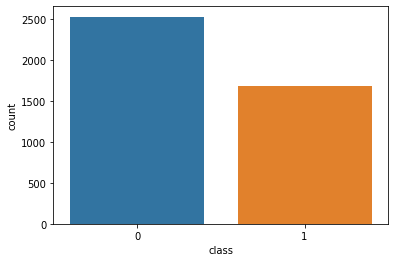

In [14]:
print(df['class'].value_counts())

print(".....................................")

sns.countplot("class", data = df)


# Naive Bayes (80% training)

In [28]:
#defining our dependent and independent variables
X = df.drop(['class'], axis=1)
Y = df['class']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [29]:
##splitting Train and Test sets(80 - 20 set)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(3368, 57) (842, 57)


In [30]:
#training our model using gaussiamNB

clf = GaussianNB()  
model = clf.fit(X_train, Y_train)

In [31]:
# Predicting our test predictors

predicted = model.predict(X_test)
print("Accuracy is:" ,np.mean(predicted == Y_test))


Accuracy is: 0.8467933491686461


In [22]:
# Predicting a new observation
from sklearn.metrics import classification_report, confusion_matrix
predicted = model.predict(X_test)
df_mean= pd.DataFrame({'actual' : Y_test, 'predicted' : predicted})
df_mean.head()

,actual,predicted
1156,1,1
157,1,1
2549,0,0
199,1,1
2770,0,0


# Naive Bayes (70% training)

In [26]:
##splitting Train and Test sets(70 - 30 set)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#training our model using gaussiamNB
clf = GaussianNB()  
model = clf.fit(X_train, Y_train) 

# Predicting our test predictors
predicted = model.predict(X_test)

print("Accuracy is:" ,np.mean(predicted == Y_test))
print("********************************************************")

# Predicting a new observation
predicted = model.predict(X_test)
df_mean= pd.DataFrame({'actual' : Y_test, 'predicted' : predicted})
df_mean.head()

Accuracy is: 0.836104513064133
********************************************************


,actual,predicted
1156,1,1
157,1,1
2549,0,0
199,1,1
2770,0,0


# Naive Bayes (60% training) Bernoulli

In [33]:
##splitting Train and Test sets(60 - 40 set)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [38]:
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, Y)

In [39]:
# model score
model.score(X, Y)

0.8888361045130642

In [40]:
#improving our bernoulli model
#
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB(binarize = 0.1)

# Train model
model = clf.fit(X, Y)

In [41]:
# model score
model.score(X, Y)

0.9040380047505938

# Training Bernoulli at 80%

In [45]:
#defining our dependent and independent variables
x = df.drop(['class'], axis=1)
y = df['class']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB(binarize= 0.1)

# Train model
model = clf.fit(x, y)

# model score
model.score(x, y)

0.9040380047505938

From the above predictions the benernoulli has the best accuracy when improved at 90%.
 if we were to work with Gaussian only, we would have trained the model at 80% that had the highrst accuracy.